In [1]:
# Intermediate Task 1: Logistic Regression for Stock Price Movement Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

In [3]:
df = pd.read_csv("data/Stock Prices Data Set.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
df['price_change'] = df['close'].shift(-1) - df['close']
df['target'] = (df['price_change'] > 0).astype(int)


In [5]:
df.dropna(inplace=True)

X = df[['open', 'high', 'low', 'volume']]
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7441904876774011


In [11]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Precision: 0.7755706760316067
Recall: 0.6988588042166888


In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[38706 10225]
 [15226 35335]]


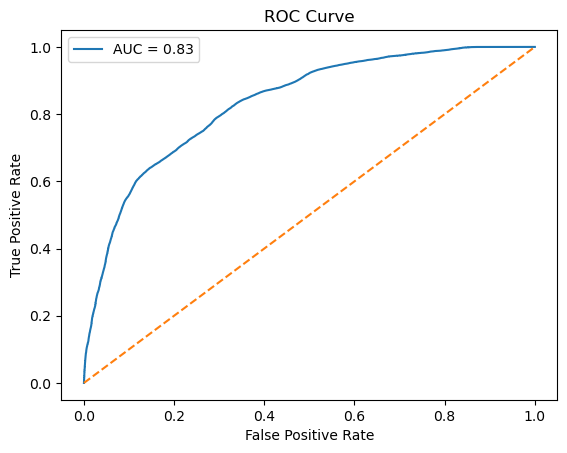

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [14]:
coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0],
    "Odds_Ratio": np.exp(model.coef_[0])
})

coeff

,Feature,Coefficient,Odds_Ratio
0,open,-1.266068,0.281938
1,high,-1.269528,0.280964
2,low,-1.264797,0.282297
3,volume,0.107129,1.113078
